<a href="https://colab.research.google.com/github/Karan1106/1-Solution/blob/master/CIFAR10(acc_above%2080%25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from keras import backend as K
K.clear_session()

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
keras.backend.clear_session()

In [3]:
(x_train,y_train), (x_test , y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


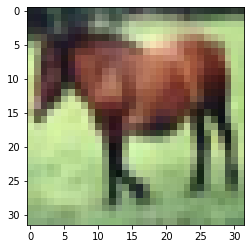

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[7])

In [5]:
print(x_train[7])

[[[ 28  35  39]
  [ 30  34  44]
  [ 33  44  47]
  ...
  [ 43  56  45]
  [ 52  64  53]
  [ 46  58  47]]

 [[ 27  30  38]
  [ 27  28  41]
  [ 21  31  39]
  ...
  [112 136  97]
  [117 140 101]
  [115 138 100]]

 [[ 34  36  42]
  [ 33  33  43]
  [ 24  30  40]
  ...
  [175 208 143]
  [177 209 144]
  [176 208 143]]

 ...

 [[142 176 118]
  [142 176 118]
  [150 184 127]
  ...
  [134 175 119]
  [128 168 112]
  [134 175 119]]

 [[140 176 124]
  [145 180 129]
  [150 186 134]
  ...
  [131 170 119]
  [130 170 119]
  [122 162 111]]

 [[134 171 123]
  [136 171 124]
  [136 171 124]
  ...
  [106 144 100]
  [104 142  99]
  [101 140  96]]]


In [6]:
print(y_train[7])

[7]


In [7]:
num_classes = 10

print("Before", y_test[0])


Before [3]


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("After", y_test[0])

After [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
print(y_train[7])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer= RMSprop(learning_rate=0.001),
              metrics = ["accuracy"])

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg.save", monitor='acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='acc', min_delta=0, patience=0, verbose=1, mode='auto')
model.fit(x_train, y_train, epochs=30,callbacks=[checkpoint,early])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples
Epoch 1/30
49600/50000 [============================>.] - ETA: 0s - loss: 0.6177 - acc: 0.8895
Epoch 00001: acc improved from -inf to 0.88959, saving model to vgg.save
50000/50000 [==============================] - 8s 152us/sample - loss: 0.6149 - acc: 0.8896
Epoch 2/30
49856/50000 [============================>.] - ETA: 0s - loss: 0.2610 - acc: 0.9039
Epoch 00002: acc improved from 0.88959 to 0.90387, saving model to vgg.save
50000/50000 [==============================] - 6s 117us/sample - loss: 0.2611 - acc: 0.9039
Epoch 3/30
49632/50000 [============================>.] - ETA: 0s - loss: 0.2531 - acc: 0.9061
Epoch 00003: acc improved from 0.90387 to 0.90612, saving model to vgg.save
50000/50000 [==============================] - 6s 119us/sample - loss: 0.2531 - acc: 0.9061
Epoch 4/30
49696

In [14]:
from google.colab import files
from keras.preprocessing import image
!pwd

/content


In [16]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = "/content/"+fn
  img = image.load_img(path, target_size=(32,32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)

classes2 = np.argmax(classes, axis=1)

if classes2[0]==0:
  print("Airplane")

elif classes2[1]==0:
  print("Automobile")

elif classes2[2]==0:
  print("Bird")

elif classes2[3]==0:
  print("Cat")

elif classes2[4]==0:
  print("Deer")

elif classes2[5]==0:
  print("Dog")

elif classes2[6]==0:
  print("Frog")

elif classes2[7]==0:
  print("Horse")

elif classes2[8]==0:
  print("Sheep")

elif classes2[9]==0:
  print("Truck")


else:
  print("Can't be recognised")

print("Done")


Saving plane.jpg to plane.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Airplane
Done
